#####   Data Science Internship Feb 2023 Batch
#####   Name: Shubham Yadav

## Exploratory Data Analysis  (EDA)

#####  Data Desc:

1. The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO).
2. The study is primarily limited  only to students with engineering disciplines.
3. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features.
4. The dataset  contains  around  40 independent variables and 4000 data points.
5. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate. Below mentioned table contains the details for the original dataset.

##### Objective

The objective of this EDA is to explore relationships and patterns between the features in the Aspiring Mind Employment Outcome 2015 dataset for engineering graduates. We aim to identify any missing values, outliers, correlations, and biases in the data.

#####  Importing necessary libraries and data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("aspiring_minds_employability_outcomes_2015.xlsx")

#####  Data Exploration:

In [3]:
df.shape

(3998, 39)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

**There is an unnamed column which contains all the values as 'train'. We cannot use this for data analysis, so we drop this column**

In [5]:
df=df.drop('Unnamed: 0',axis=1)

In [6]:
df.shape

(3998, 38)

In [7]:
# Statistical summary of the data
np.round(df.describe())

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,...,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0
mean,663795.0,307700.0,78.0,2008.0,74.0,5157.0,2.0,71.0,5157.0,0.0,...,91.0,23.0,16.0,32.0,3.0,-0.0,0.0,0.0,-0.0,-0.0
std,363218.0,212737.0,10.0,2.0,11.0,4802.0,0.0,8.0,4802.0,0.0,...,175.0,98.0,88.0,105.0,37.0,1.0,1.0,1.0,1.0,1.0
min,11244.0,35000.0,43.0,1995.0,40.0,2.0,1.0,6.0,2.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-4.0,-6.0,-5.0,-3.0,-7.0
25%,334284.0,180000.0,72.0,2007.0,66.0,494.0,2.0,66.0,494.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,-1.0,-1.0
50%,639600.0,300000.0,79.0,2008.0,74.0,3879.0,2.0,72.0,3879.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,-0.0,-0.0
75%,990480.0,370000.0,86.0,2009.0,83.0,8818.0,2.0,76.0,8818.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0
max,1298275.0,4000000.0,98.0,2013.0,99.0,18409.0,2.0,100.0,18409.0,1.0,...,715.0,623.0,676.0,548.0,516.0,2.0,2.0,3.0,3.0,2.0


We need to also convert DOJ and DOL which are given in timestamp format to date.In DOL, we can see the value `present`. We will convert this into the present date for out analysis

In [8]:
import datetime as dt
df["DOJ"]=pd.to_datetime(df["DOJ"]).dt.date
df["DOL"].replace("present",dt.datetime.today(),inplace=True)
df['DOL'] = pd.to_datetime(df['DOL']).dt.date

# we can just Engineer the period of time the person has been in the org
df['Period'] = pd.to_datetime(df["DOL"]).dt.year - pd.to_datetime(df['DOJ']).dt.year


df['DOB'] = pd.to_datetime(df['DOB']).dt.year
df.head(5)

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Period
0,203097,420000,2012-06-01,2023-04-17,senior quality engineer,Bangalore,f,1990,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,11
1,579905,500000,2013-09-01,2023-04-17,assistant manager,Indore,m,1989,85.4,cbse,...,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,10
2,810601,325000,2014-06-01,2023-04-17,systems engineer,Chennai,f,1992,85.0,cbse,...,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,9
3,267447,1100000,2011-07-01,2023-04-17,senior software engineer,Gurgaon,m,1989,85.6,cbse,...,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,12
4,343523,200000,2014-03-01,2015-03-01,get,Manesar,m,1991,78.0,cbse,...,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1


#### Univariate Analysis

<Axes: ylabel='Density'>

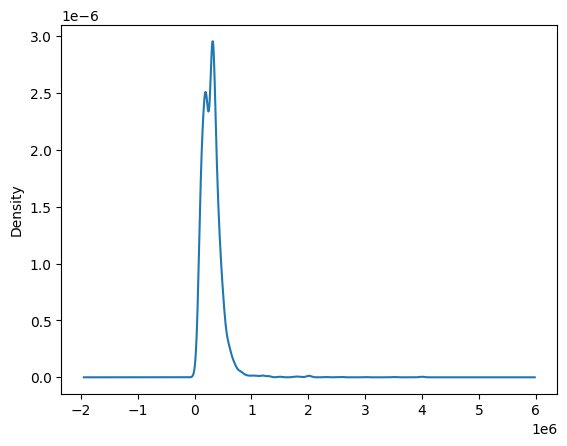

In [9]:
# Salary
df['Salary'].plot(kind='kde')

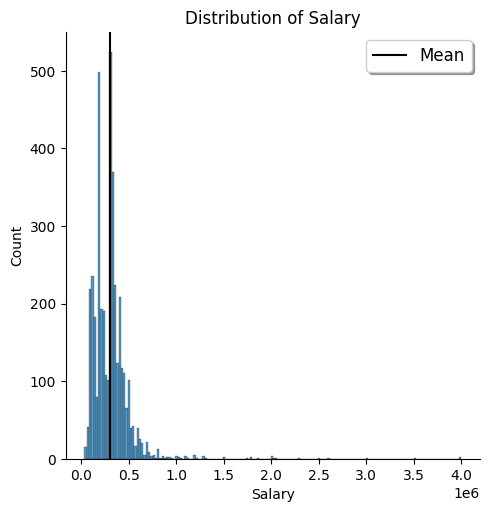

In [10]:
sns.displot(df['Salary'])
plt.axvline(df['Salary'].mean(),color='black', label='Mean')
plt.title("Distribution of Salary")
plt.legend(shadow=True,fontsize="larger")

From the above plot as we can see that it's having a long tail at the right side , looks like log normal distribution

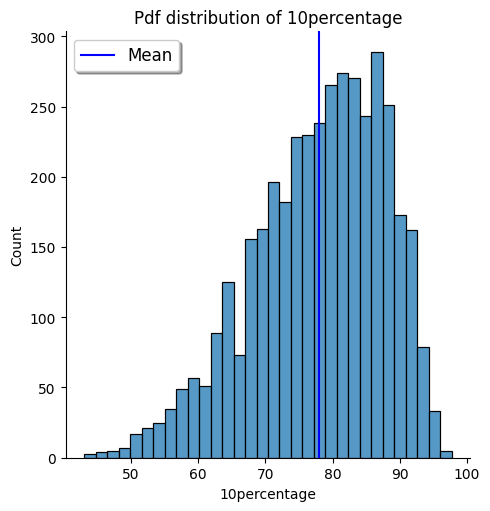

In [11]:
# 10percentage
sns.displot(df['10percentage'])
plt.axvline(df['10percentage'].mean(), color="blue", label="Mean")
plt.title("Pdf distribution of 10percentage")
plt.legend(shadow=True,fontsize="larger")

From the above plot as we can see that it's having a thick tail towards the left side looks like a negatively skewed distribution

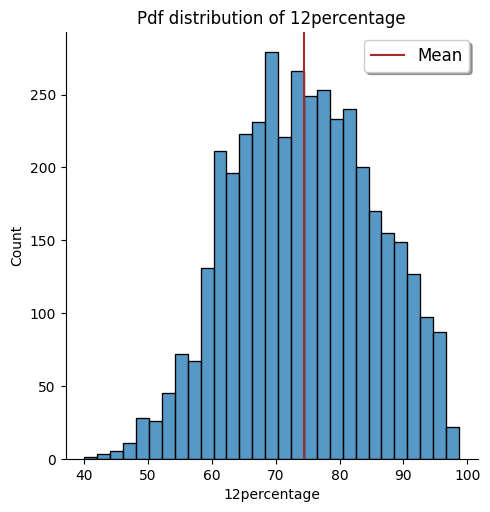

In [12]:
#12percentage
sns.displot(df['12percentage'])
plt.axvline(df['12percentage'].mean(), color="brown", label="Mean")
plt.title("Pdf distribution of 12percentage")
plt.legend(shadow=True,fontsize="larger")

Similar to 10percentage we can see that it's having a tail towards left side looks like a negatively skewed distribution

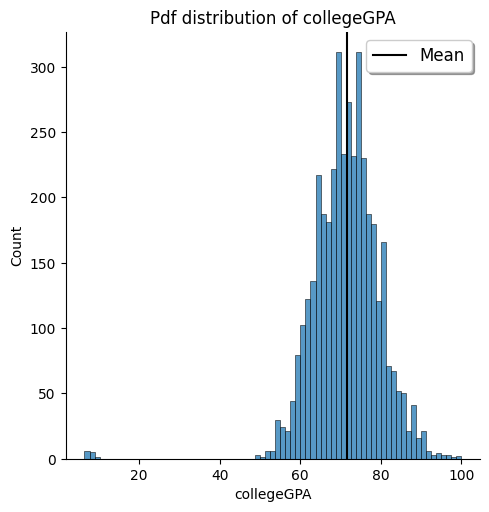

In [13]:
# collegeGPA
sns.displot(df['collegeGPA'])
plt.axvline(df['collegeGPA'].mean(), color="black", label="Mean")
plt.title("Pdf distribution of collegeGPA")
plt.legend(shadow=True,fontsize="larger")

Similarly here too we can see a tail towards left looks highly negatively skewed 

##### Plotting Gender Wise Distribution:

<Axes: ylabel='Gender'>

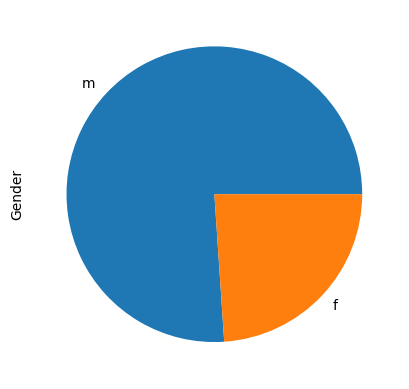

In [14]:
df['Gender'].value_counts().plot(kind='pie')

From the above plot we can say that there are more male candidates than female

In [15]:
#Designation
designation=df['Designation'].value_counts()

<Axes: >

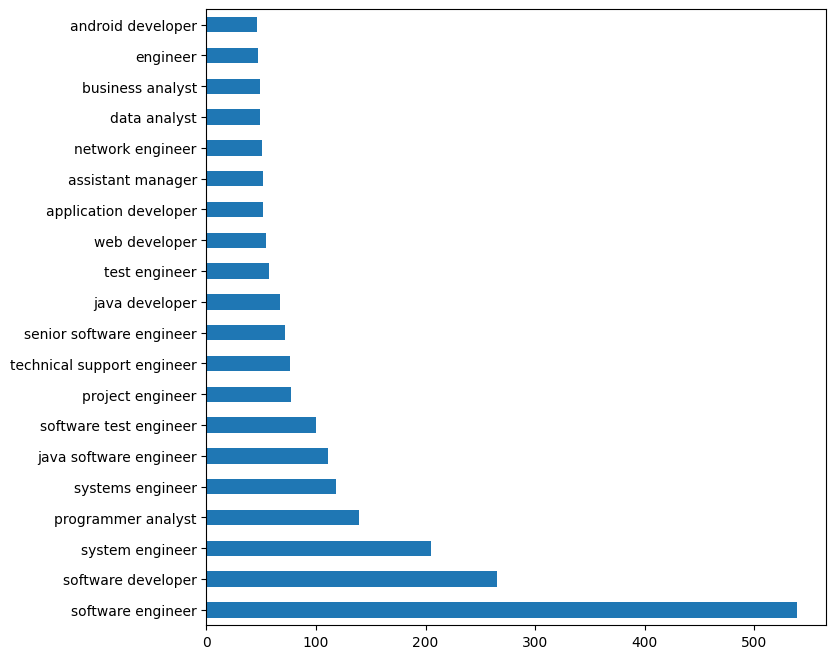

In [16]:
designation[:20].plot(kind='barh',figsize=(8,8))

From the above plot we can analyse that most of the candidates as placed as software engineers

##### Location of the jobcity and it's count:

In [17]:
len(df['JobCity'].unique())

339

There are 339 unique values

In [18]:
df['JobCity'].value_counts()

Bangalore           627
-1                  461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Tirunelvelli          1
Ernakulam             1
Nanded                1
Dharmapuri            1
Asifabadbanglore      1
Name: JobCity, Length: 339, dtype: int64

Here we can see an anomaly "-1", im simply going to replace it with na and drop it

In [19]:
df['JobCity'].replace(-1,np.nan,inplace=True)
df['JobCity'].dropna(inplace=True)

In [20]:
jobcity=df['JobCity'].value_counts()

<Axes: >

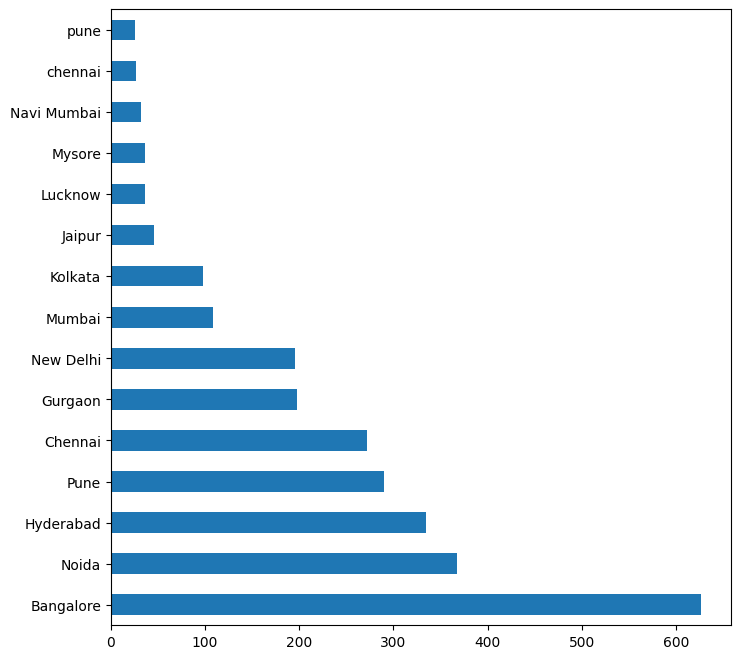

In [21]:
jobcity[:15].plot(kind='barh',figsize=(8,8))

From the above plot we can see that most amcat aspirants work in bengaluru,Noida,hyderabad and pune.
* It might be because most of them are from IT domain so majority of them work in these cities

##### Unique Degrees and their count:

In [22]:
degree=df['Degree'].value_counts()
degree

B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

There are 4 unique values 

<Axes: >

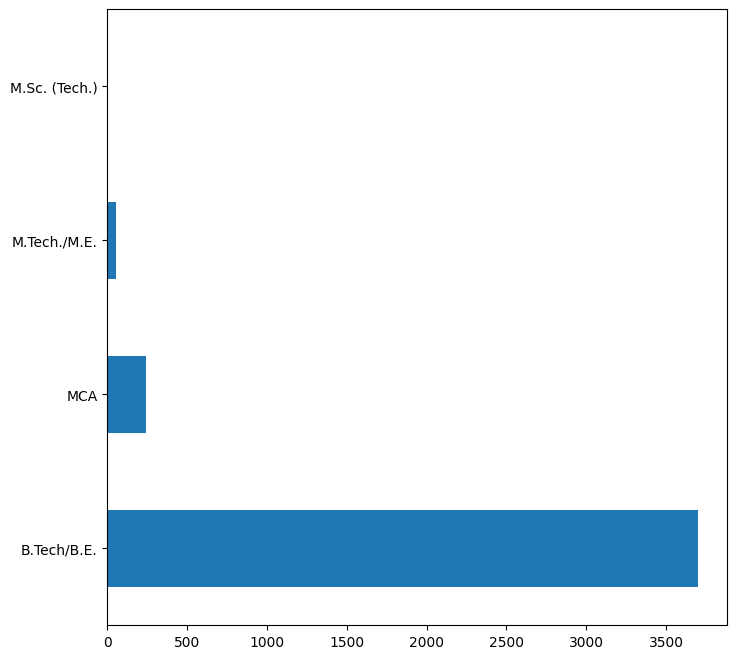

In [23]:
degree.plot(kind='barh',figsize=(8,8))

Most of the candidates are from B.Tech/B.E. background

##### Specialization and it's count:

In [24]:
len(df['Specialization'].unique())

46

There are 46 unizue specialization

In [25]:
specialization = df['Specialization'].value_counts()

<Axes: >

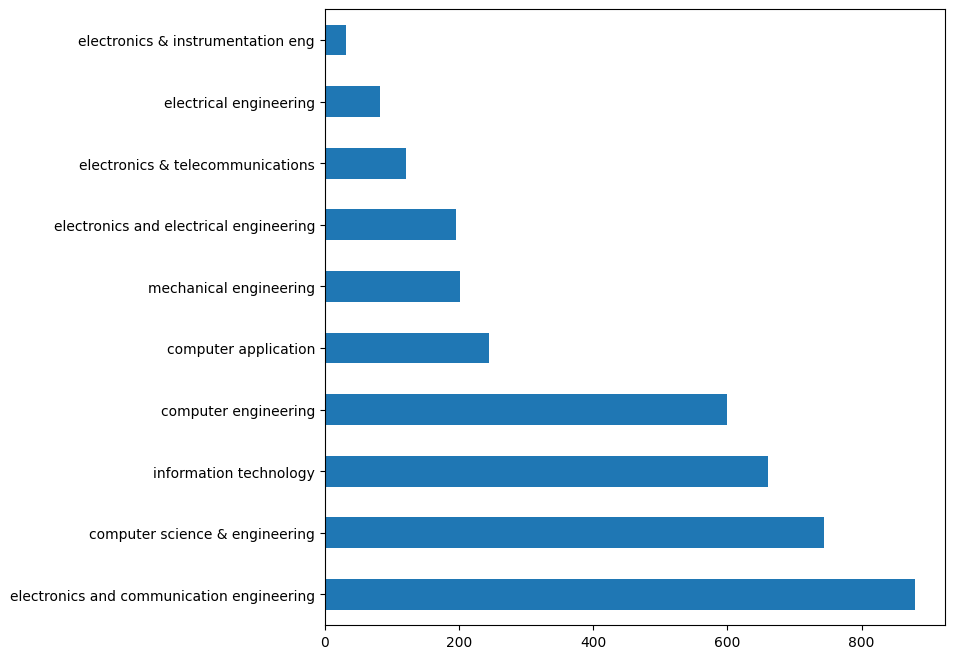

In [26]:
specialization[:10].plot(kind='barh',figsize=(8,8))

Most students specialized in Electronics and communication engineering

##### College state and it's count:

In [27]:
len(df['CollegeState'].unique())

26

In [28]:
clg_state=df['CollegeState'].value_counts()

<Axes: >

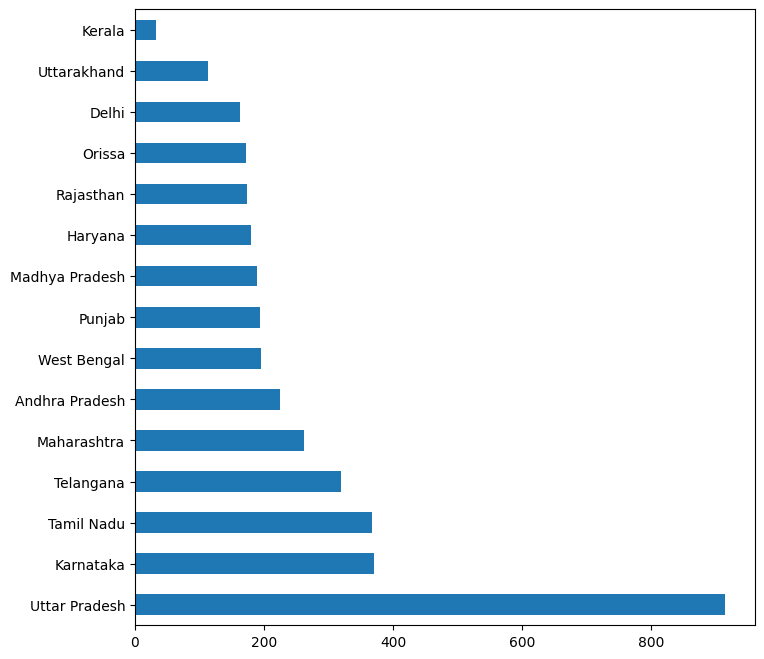

In [29]:
clg_state[:15].plot(kind='barh',figsize=(8,8))

Uttar Pradesh has the most number of preference colleges

#####  Outlier Detection:

<Axes: >

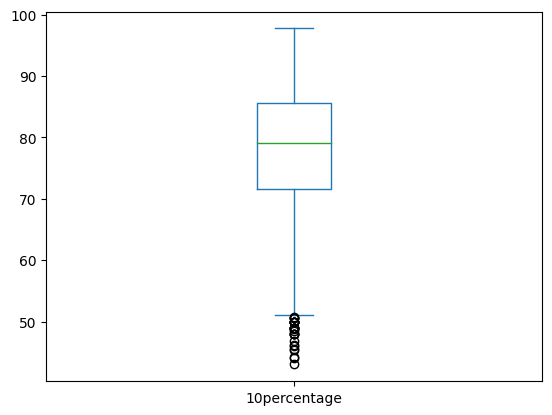

In [30]:
# 10 percentage column
df['10percentage'].plot(kind='box')

From the above plot we can see there are some outliers 

In [31]:
# Outliers for 10 percentage 
df['10percentage'][df['10percentage']<52].reset_index()

,index,10percentage
0,108,51.00
1,245,50.60
2,466,44.16
3,490,44.00
4,491,45.60
5,502,48.00
6,600,49.00
7,613,48.00
8,887,51.20
9,898,49.00


<Axes: >

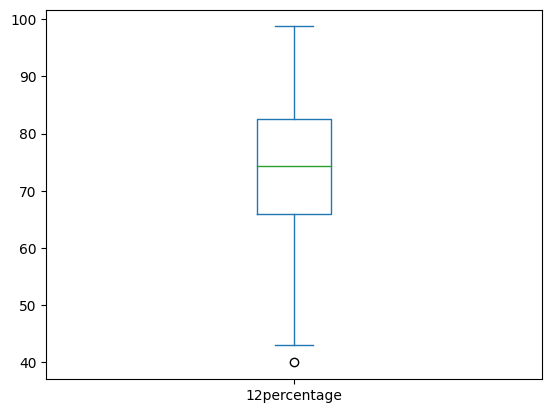

In [32]:
#12percentage column/feature
df['12percentage'].plot(kind='box')

Here we can see a single outlier this we can ignore

<Axes: >

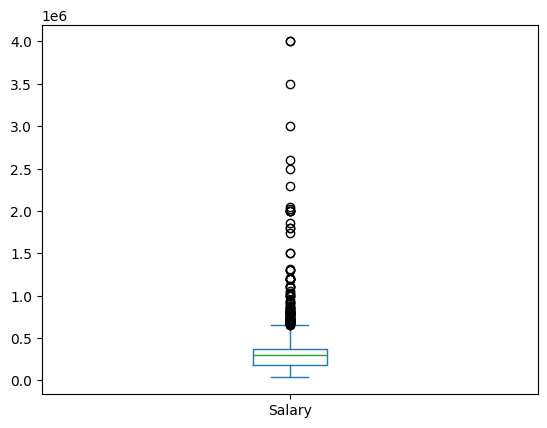

In [33]:
# Salary column
df['Salary'].plot(kind='box')

From the above boxplot we can see that there are many outliers in the salary column

<Axes: >

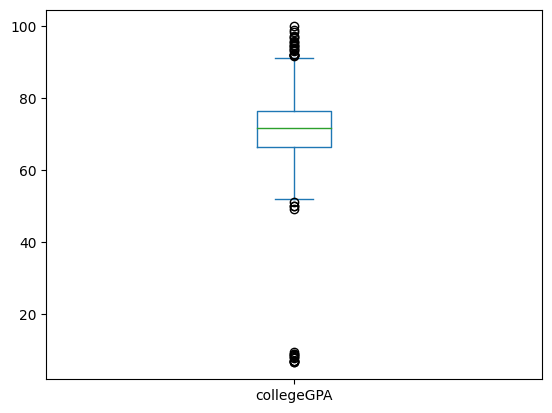

In [34]:
# College GPA column
df['collegeGPA'].plot(kind='box')

There are some outliers in the COllege GPA column

In [35]:
# Outliers CollegeGPA
df['collegeGPA'][(df['collegeGPA']<53) | (df['collegeGPA']>93)].reset_index()

,index,collegeGPA
0,7,8.58
1,138,6.63
2,324,52.00
3,614,93.60
4,690,99.93
5,788,6.80
6,874,94.50
7,907,50.00
8,968,52.00
9,1134,96.00


<Axes: >

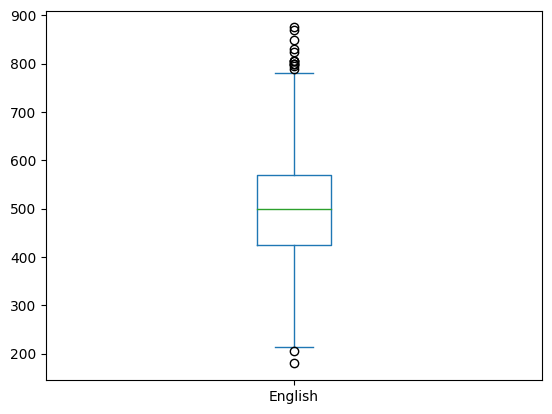

In [36]:
# English COlumn
df['English'].plot(kind='box')

here we can see there are some outliers


In [37]:
df['English'][(df['English']<220) | (df['English']>790)].reset_index()

,index,English
0,275,875
1,444,825
2,624,215
3,668,870
4,847,800
5,935,205
6,1183,805
7,1217,180
8,1450,830
9,1519,795


<Axes: >

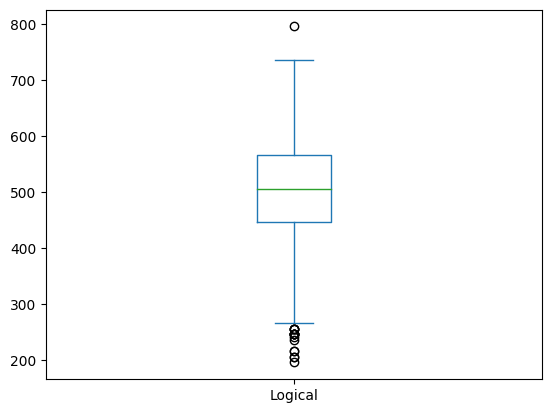

In [38]:
# Logical column
df['Logical'].plot(kind='box')

From the above plot we can say that there are some outliers

<Axes: >

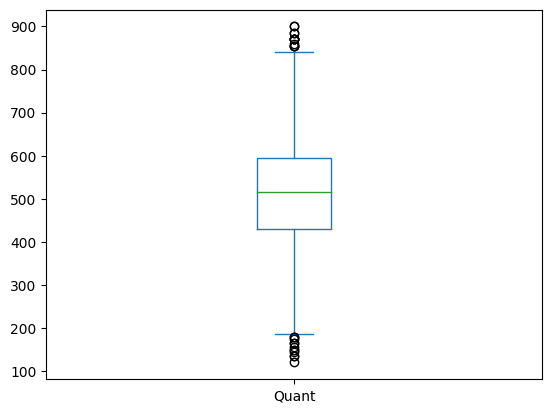

In [39]:
#Quant
df['Quant'].plot(kind='box')

HEre we can see many outliers

In [40]:
df['Quant'][(df['Quant']<190) | (df['Quant']>850)].reset_index()

,index,Quant
0,195,870
1,522,165
2,564,180
3,698,860
4,783,180
5,899,870
6,1148,175
7,1310,870
8,1661,870
9,1815,135


<Axes: >

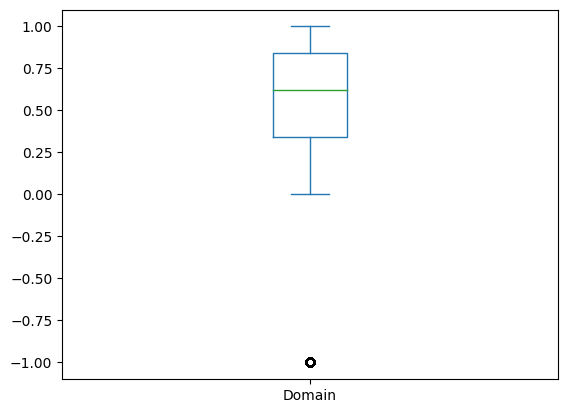

In [41]:
# Domain
df['Domain'].plot(kind='box')

Here we can see there are not a lot of outliers but the value for one outlier is really skewed

In [42]:
df['Domain'][df['Domain'] <= -1].value_counts().reset_index()

,index,Domain
0,-1.0,246


<Axes: >

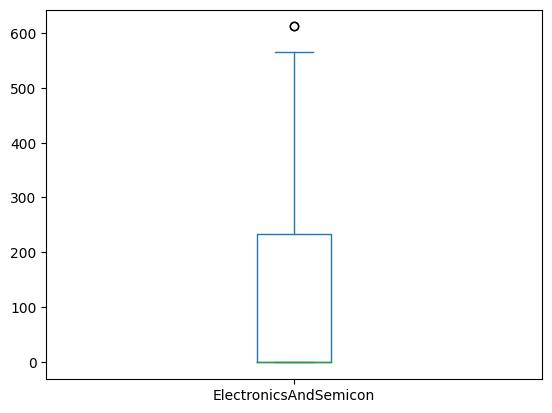

In [43]:
# ElectronicsAndSemicon
df['ElectronicsAndSemicon'].plot(kind='box')

In [44]:
df['ElectronicsAndSemicon'][df['ElectronicsAndSemicon'] > 600].reset_index()

,index,ElectronicsAndSemicon
0,1557,612
1,3889,612


<Axes: >

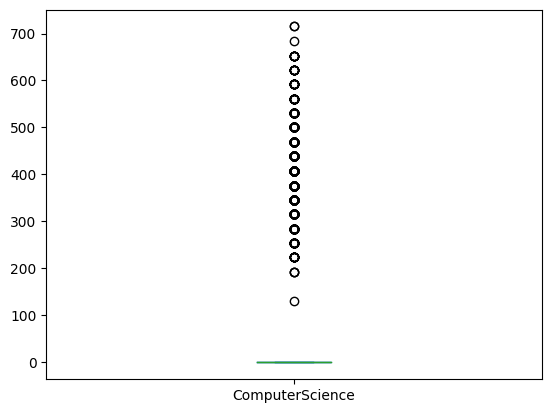

In [45]:
df['ComputerScience'].plot(kind='box')

In [46]:
df['ComputerScience'][df['ComputerScience'] > 100].value_counts().reset_index()

,index,ComputerScience
0,407,128
1,376,123
2,346,118
3,438,111
4,469,80
5,315,77
6,500,64
7,284,50
8,530,45
9,253,30


<Axes: >

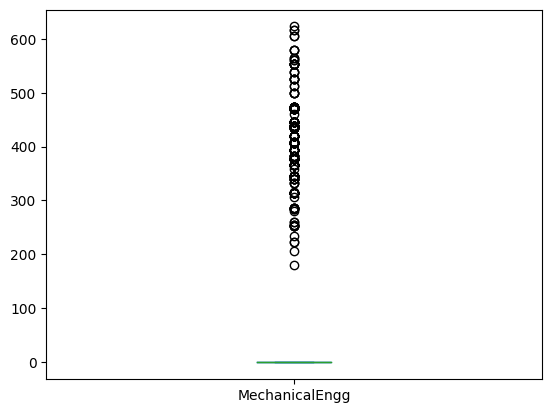

In [47]:
df['MechanicalEngg'].plot(kind='box')

In [48]:
df['MechanicalEngg'][df['MechanicalEngg'] > 170].value_counts().reset_index()

,index,MechanicalEngg
0,366,20
1,446,16
2,438,15
3,420,14
4,376,13
5,313,13
6,393,13
7,407,12
8,346,11
9,473,10


<Axes: >

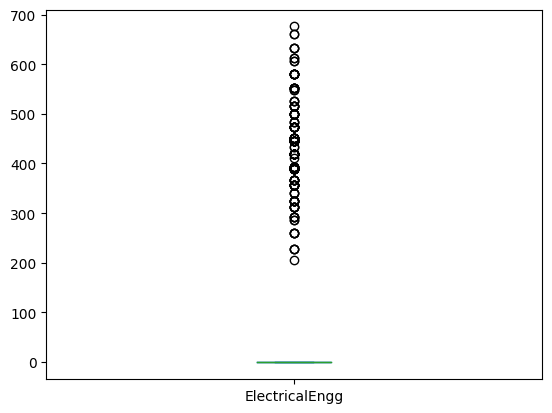

In [49]:
df['ElectricalEngg'].plot(kind='box')

A lot of outliers

In [50]:
df['ElectricalEngg'][df['ElectricalEngg'] > 200].value_counts().reset_index()

,index,ElectricalEngg
0,420,16
1,446,14
2,388,10
3,473,10
4,452,10
5,356,9
6,500,8
7,580,8
8,393,7
9,324,7


<Axes: >

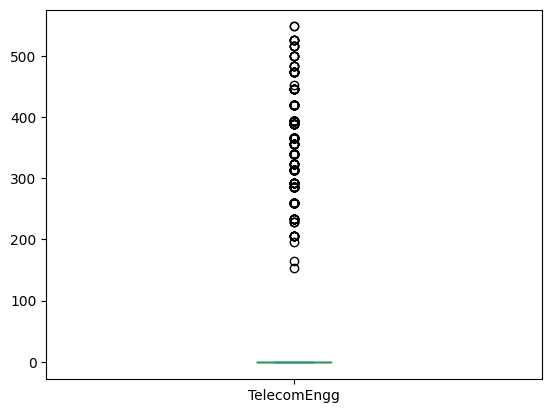

In [51]:
df['TelecomEngg'].plot(kind='box')

In [52]:
df['TelecomEngg'][df['TelecomEngg'] > 150].value_counts().reset_index()

,index,TelecomEngg
0,393,45
1,366,43
2,260,35
3,313,34
4,340,32
5,286,31
6,420,26
7,446,16
8,388,14
9,233,14


#####  Bivariate Analysis:

We can simply find the corelation between various features using the corr() method:

In [53]:
# For this we need numerical df
num_df=df.select_dtypes(include=['int64','float64'])
# Now to drop unnecessary columns like ID, CollegeID
num_df.drop(columns=['ID','CollegeID','CollegeCityID'],inplace=True)

In [54]:
num_df.corr()

,Salary,DOB,10percentage,12graduation,12percentage,CollegeTier,collegeGPA,CollegeCityTier,GraduationYear,English,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Period
Salary,1.000000,-0.151714,0.177373,-0.161383,0.170254,-0.179332,0.130103,0.015384,-0.010053,0.178219,...,0.018475,-0.047598,-0.022691,0.037639,-0.064148,0.057423,-0.010213,-0.054685,-0.011312,0.249741
DOB,-0.151714,1.000000,0.243880,0.872401,0.265781,0.043154,0.113168,-0.035623,0.025639,0.101117,...,0.034459,0.113212,0.010790,-0.013263,0.101942,0.023547,0.055499,-0.079076,-0.011274,0.015249
10percentage,0.177373,0.243880,1.000000,0.269957,0.643378,-0.126042,0.312538,0.116707,-0.013799,0.350780,...,0.050364,0.074419,0.049378,0.030002,0.067657,0.136645,-0.004679,-0.132496,0.036692,0.146482
12graduation,-0.161383,0.872401,0.269957,1.000000,0.259166,0.027691,0.086001,-0.003016,0.014457,0.147925,...,0.035459,0.123751,0.023470,-0.004727,0.103329,0.041182,0.061956,-0.074369,-0.015069,0.017910
12percentage,0.170254,0.265781,0.643378,0.259166,1.000000,-0.100771,0.346137,0.130462,-0.012933,0.212888,...,0.037635,0.064001,0.044201,0.005910,0.058299,0.103998,-0.007486,-0.094369,0.006332,0.136137
CollegeTier,-0.179332,0.043154,-0.126042,0.027691,-0.100771,1.000000,-0.086781,-0.101494,-0.005557,-0.183843,...,-0.021548,0.002594,0.000007,-0.033722,0.055174,-0.038055,0.009970,0.023778,-0.019179,-0.044965
collegeGPA,0.130103,0.113168,0.312538,0.086001,0.346137,-0.086781,1.000000,0.017471,0.008706,0.106478,...,-0.031765,0.052258,-0.005226,-0.018950,0.069582,0.068282,-0.032684,-0.074859,0.028071,0.111034
CollegeCityTier,0.015384,-0.035623,0.116707,-0.003016,0.130462,-0.101494,0.017471,1.000000,0.008152,0.050462,...,-0.052395,0.010311,0.049876,-0.033392,0.014763,0.005565,-0.008203,0.004442,-0.016790,0.014994
GraduationYear,-0.010053,0.025639,-0.013799,0.014457,-0.012933,-0.005557,0.008706,0.008152,1.000000,-0.024089,...,-0.066844,0.008525,0.004226,0.001696,-0.013235,-0.002877,0.008397,-0.000417,0.016855,0.014629
English,0.178219,0.101117,0.350780,0.147925,0.212888,-0.183843,0.106478,0.050462,-0.024089,1.000000,...,-0.002477,0.032438,-0.005822,-0.007724,0.034943,0.194990,0.018755,-0.155528,0.067979,0.099781


**As we can see above the most of the data points are between -1 to +1 where -1 means negatively correlated and +1 means highly positive relation**

We can vizualize this Correlation using a heatmap

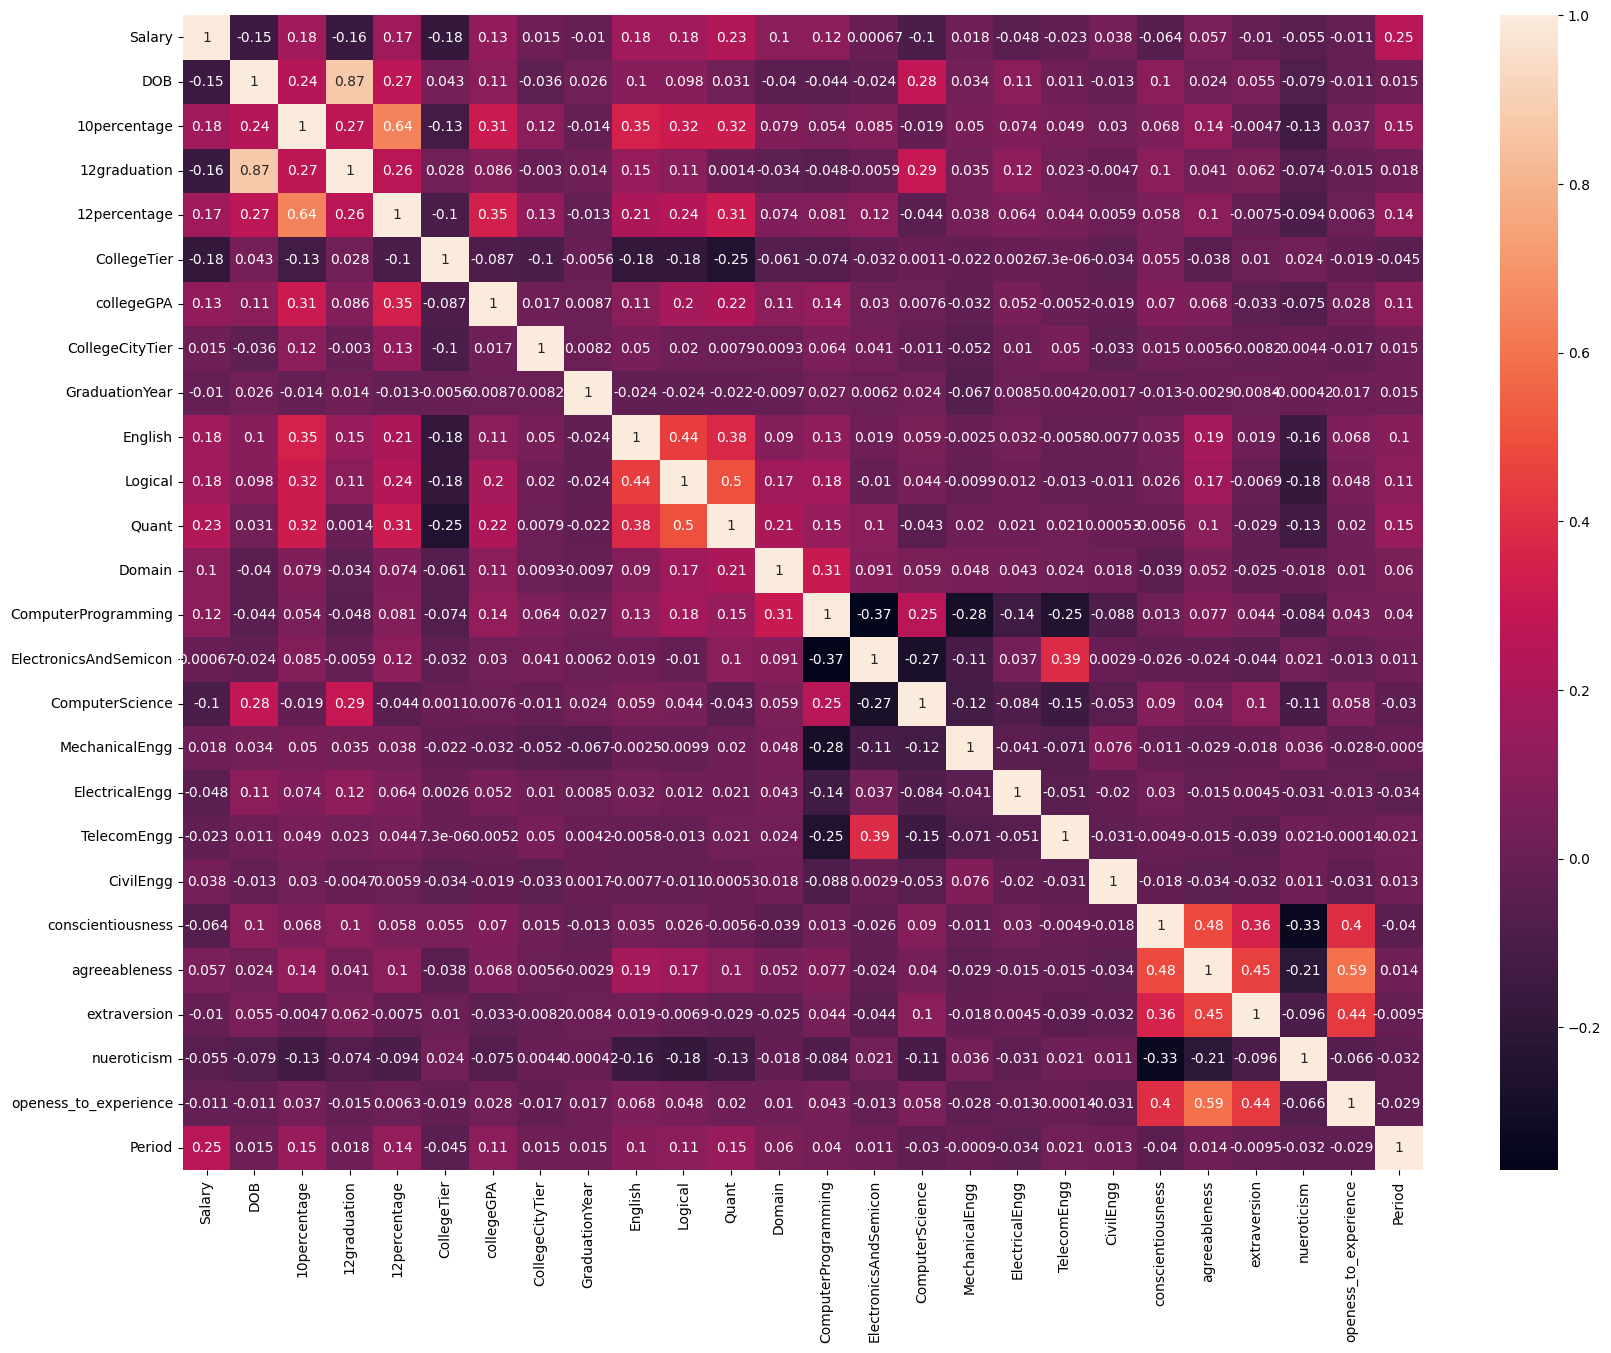

In [55]:
plt.figure(figsize=(20,15))
sns.heatmap(num_df.corr() , annot=True)
plt.show()

1. **From this heatmap we can observe that 10th percentage and 12th percentage are positively correlated with each other meaning if a student got good marks in 10th this it is highly likely that they will get better marks in 12th as well.**
2. **We can also see that subjects English, Logical and Quants are also positively correlated meaning if a student is good in one of the above subjects then they will get better marks in the other subjects too.**
3. **Also in the bottom right corner of the heatmap we can also see that conscientiousness, Agreebleness, Extraversion and Openess_to_experience are also highly correlated with each other.**

Correlation between features using scatterplot:

<Axes: xlabel='10percentage', ylabel='12percentage'>

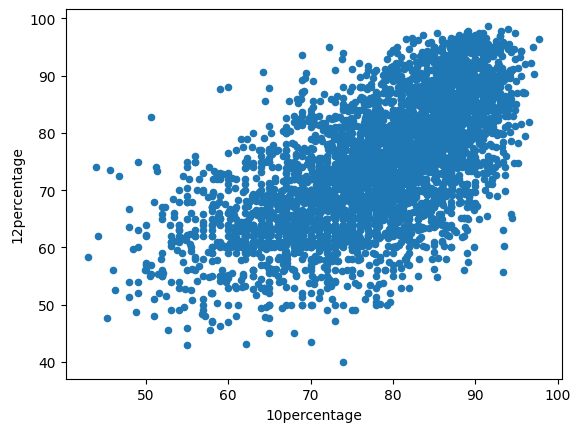

In [56]:
num_df.plot(kind='scatter',x="10percentage",y="12percentage")

<Axes: xlabel='10percentage', ylabel='12percentage'>

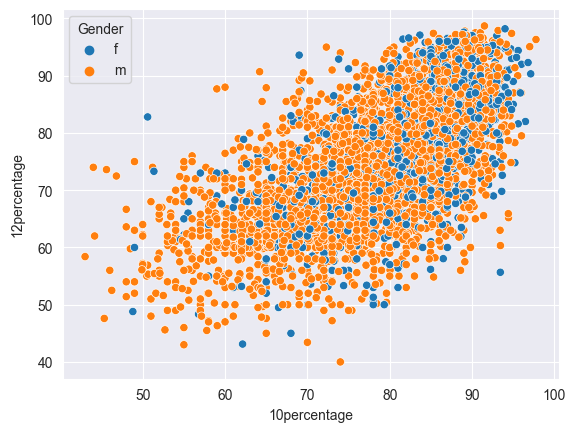

In [57]:
sns.set_style("darkgrid")
sns.scatterplot(data=df, x="10percentage", y="12percentage",hue="Gender")

This plot solidifies the correlation between 10percentage and 12percentage that was previously denoted in the heatmap

### Salary with College Tier

In [58]:
high = list(df.sort_values("Salary",ascending=False)["Designation"].unique())[:20]
high_pay = df[df['Designation'].isin(high)]

<Axes: xlabel='CollegeTier', ylabel='Salary'>

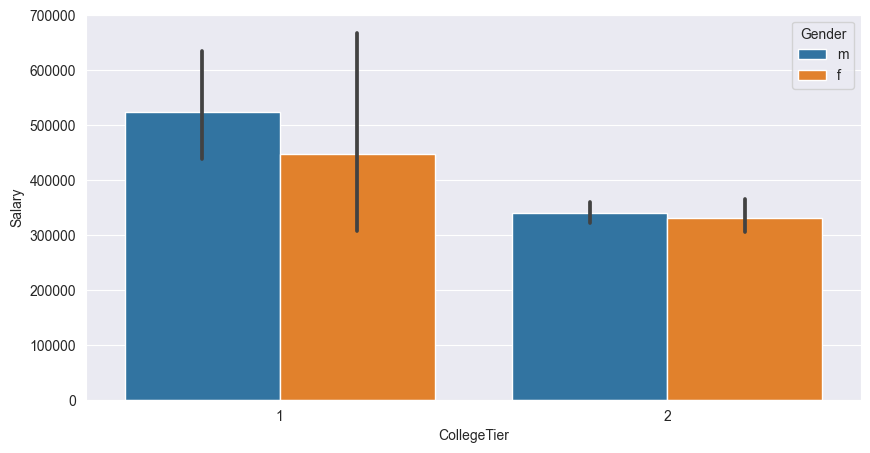

In [59]:
plt.figure(figsize=(10,5))
sns.barplot(data=high_pay,x='CollegeTier',y='Salary',hue='Gender')

In [60]:
high_pay.groupby('CollegeTier').Gender.value_counts()

CollegeTier  Gender
1            m          85
             f          17
2            m         897
             f         287
Name: Gender, dtype: int64

* From the above bar graph,we can see that students from tier1 colleges have higher salary.
* We can see more men are from tier1 colleges than women and overally most students are from tier2 colleges.

###  Research Questions:

**Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data.**

#### Hypothesis Testing:

<Axes: xlabel='Designation', ylabel='Salary'>

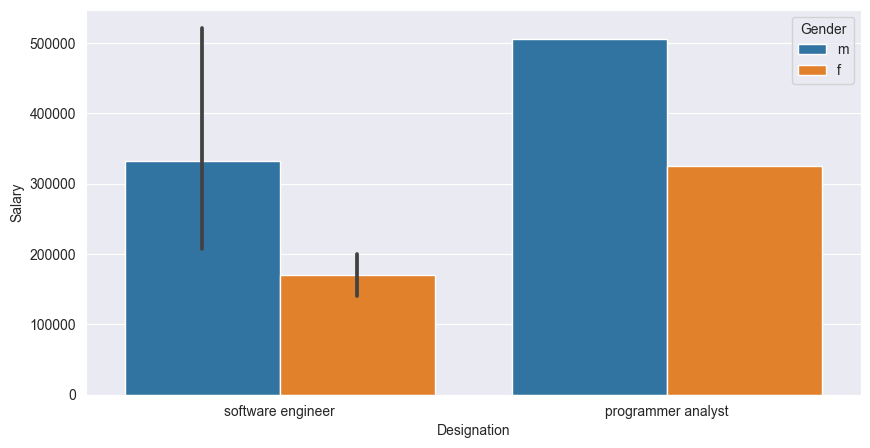

In [61]:
new_df=df[(df["Designation"].isin(["programmer analyst","software engineer","hardware engineer","associate engineer"])) & (df["Period"]==0)]
plt.figure(figsize=(10,5))
sns.barplot(x="Designation",y="Salary",hue="Gender",data=new_df)

* For Freshers,the salary is starting from 200k and male are earing more than female as a fresher.

1 sample T-test to verify the claim

* Null Hypothesis: H0 = 2.5LPA
* Alt Hypothesis : Ha != 2.5LPA

In [62]:
from scipy import stats as st
from scipy.stats import chi2_contingency as cst
pval = st.ttest_1samp(new_df['Salary'],popmean=250000)[1]

if pval < 0.05:
    print('We reject the null hypothesis and Average salary is not equal to 250k')
else:
    print('We fail to reject null hypothesis and Avergae salary is equal to 250k')


We fail to reject null hypothesis and Avergae salary is equal to 250k


Chi-square test to check the relation between specialization and gender.
* H0:Gender does not impact specialization
* Ha:Gender impacts specialization

In [63]:
col = pd.crosstab(df['Gender'],df['Specialization'],margins=True)
pv = cst(col)[1]
if pv < 0.05:
    print('We reject the null hypothesis and Gender impacts specialization')
else:
    print('We fail to reject null hypothesis and Gender does not impact specialization')

We fail to reject null hypothesis and Gender does not impact specialization


SO the claims made were True

#### Feature Transformation

#### For Numerical Features -> Do Column Standardization

In [64]:
# Column standardization using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [65]:
# Standardizing Salary Column
scaled_sal = scaler.fit_transform(df['Salary'].values.reshape(-1,1))

# First 20 Scaled Values (Salary column)
print(scaled_sal[:20])

[[0.09709962]
 [0.11727617]
 [0.07313997]
 [0.26860025]
 [0.04161412]
 [0.0668348 ]
 [0.0668348 ]
 [0.09205549]
 [0.14249685]
 [0.04918033]
 [0.14249685]
 [0.10466583]
 [0.0592686 ]
 [0.04161412]
 [0.0668348 ]
 [0.07944515]
 [0.07313997]
 [0.05422446]
 [0.02143758]
 [0.07313997]]


In [66]:
# Standardizing 10th percent Column
scaled_10 = scaler.fit_transform(df['10percentage'].values.reshape(-1,1))

# First 20 Scaled Values (Salary column)
print(scaled_10[:20])

[[0.75420015]
 [0.7742878 ]
 [0.7669832 ]
 [0.7779401 ]
 [0.63915267]
 [0.8568298 ]
 [0.78670562]
 [0.89481373]
 [0.85829072]
 [0.62089116]
 [0.83272462]
 [0.69393718]
 [0.74141709]
 [0.32505478]
 [0.69758948]
 [0.48466034]
 [0.7815924 ]
 [0.32505478]
 [0.4017531 ]
 [0.65741417]]


In [67]:
# Standardizing 12th percent Column
scaled_12 = scaler.fit_transform(df['12percentage'].values.reshape(-1,1))

# First 20 Scaled Values (Salary column)
print(scaled_12[:20])

[[0.95059625]
 [0.76660988]
 [0.48040886]
 [0.7427598 ]
 [0.62691652]
 [0.80068143]
 [0.46848382]
 [0.86882453]
 [0.87223169]
 [0.54855196]
 [0.74446337]
 [0.78364566]
 [0.50817717]
 [0.38160136]
 [0.67972743]
 [0.41618399]
 [0.59284497]
 [0.45417376]
 [0.42248722]
 [0.37819421]]


#### Column Standardization for Categorical

In [68]:
# One-hot Encoding of Gender column
dummies = pd.get_dummies(df[['Gender']])
dummies

,Gender_f,Gender_m
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
3993,0,1
3994,1,0
3995,0,1
3996,1,0


In [69]:
df1 = pd.concat([df,dummies],axis='columns')
df1.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Period,Gender_f,Gender_m
0,203097,420000,2012-06-01,2023-04-17,senior quality engineer,Bangalore,f,1990,84.3,"board ofsecondary education,ap",...,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,11,1,0
1,579905,500000,2013-09-01,2023-04-17,assistant manager,Indore,m,1989,85.4,cbse,...,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,10,0,1
2,810601,325000,2014-06-01,2023-04-17,systems engineer,Chennai,f,1992,85.0,cbse,...,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,9,1,0
3,267447,1100000,2011-07-01,2023-04-17,senior software engineer,Gurgaon,m,1989,85.6,cbse,...,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,12,0,1
4,343523,200000,2014-03-01,2015-03-01,get,Manesar,m,1991,78.0,cbse,...,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1,0,1


In [70]:
finaldf = df1.drop(['Gender','Gender_f'],axis='columns')
finaldf

,ID,Salary,DOJ,DOL,Designation,JobCity,DOB,10percentage,10board,12graduation,...,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Period,Gender_m
0,203097,420000,2012-06-01,2023-04-17,senior quality engineer,Bangalore,1990,84.30,"board ofsecondary education,ap",2007,...,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,11,0
1,579905,500000,2013-09-01,2023-04-17,assistant manager,Indore,1989,85.40,cbse,2007,...,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,10,1
2,810601,325000,2014-06-01,2023-04-17,systems engineer,Chennai,1992,85.00,cbse,2010,...,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,9,0
3,267447,1100000,2011-07-01,2023-04-17,senior software engineer,Gurgaon,1989,85.60,cbse,2007,...,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,12,1
4,343523,200000,2014-03-01,2015-03-01,get,Manesar,1991,78.00,cbse,2008,...,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000,2011-10-01,2012-10-01,software engineer,New Delhi,1987,52.09,cbse,2006,...,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194,1,1
3994,752781,100000,2013-07-01,2013-07-01,technical writer,Hyderabad,1992,90.00,state board,2009,...,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943,0,0
3995,355888,320000,2013-07-01,2023-04-17,associate software engineer,Bangalore,1991,81.86,"bse,odisha",2008,...,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615,10,1
3996,947111,200000,2014-07-01,2015-01-01,software developer,Asifabadbanglore,1992,78.72,state board,2010,...,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943,1,0
